In [ ]:
#HW3

In [171]:
#Install tidyverse
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }


In [172]:
#Install lubridate
install.packages("lubridate")
library(lubridate)


The downloaded binary packages are in
	/var/folders/c1/3jgbfbvj7dv1_6065q6b0_300000gn/T//Rtmp3PIeBf/downloaded_packages


In [173]:
#QUESTION 5
#Download the patient_names and patient_properties csv files 
properties <- read_csv("patient_properties.csv")
names <- read_csv("patient_names.csv")
#Print the first 10 observations of each
head(properties, 10)
head(names, 10)
      

Rows: 3896 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 974 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,property,value
<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,3/19/77,NA,Nikita578,Erdman779,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2/19/40,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,6/4/58,NA,Quinn173,Marquardt819,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,12/25/28,9/29/17,Abel832,Smitham825,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,12/25/28,2/23/14,Edwin773,Labadie908,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,12/25/28,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,11/8/57,NA,Eilene124,Walsh511,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,6/27/72,NA,Lowell343,Price929,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,3/6/54,NA,Adrian111,Gleason633,Boston,Massachusetts


In [174]:
#Manually set the date columns to be date variables
#Check data structure of columns
str(properties)
str(names)

spc_tbl_ [3,896 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID      : chr [1:3896] "5605b66b-e92d-c16c-1b83-b8bf7040d51f" "5605b66b-e92d-c16c-1b83-b8bf7040d51f" "5605b66b-e92d-c16c-1b83-b8bf7040d51f" "5605b66b-e92d-c16c-1b83-b8bf7040d51f" ...
 $ property: chr [1:3896] "MARITAL" "RACE" "ETHNICITY" "GENDER" ...
 $ value   : chr [1:3896] "M" "white" "nonhispanic" "F" ...
 - attr(*, "spec")=
  .. cols(
  ..   ID = col_character(),
  ..   property = col_character(),
  ..   value = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 
spc_tbl_ [974 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID       : chr [1:974] "5605b66b-e92d-c16c-1b83-b8bf7040d51f" "6e5ae27c-8038-7988-e2c0-25a103f01bfa" "8123d076-0886-9007-e956-d5864aa121a7" "770518e4-6133-648e-60c9-071eb2f0e2ce" ...
 $ BIRTHDATE: chr [1:974] "3/19/77" "2/19/40" "6/4/58" "12/25/28" ...
 $ DEATHDATE: chr [1:974] NA NA NA "9/29/17" ...
 $ FIRST    : chr [1:974] "Nikita578" "Zane918" "Quinn173" "Abel832" ...
 $ LAST     : chr

In [175]:
#Manually set the date columns to be date variables
bday <- mdy(names$BIRTHDATE)
#Fix future date problem (e.g., 2040)
bday[bday > Sys.Date()] <- bday[bday > Sys.Date()] %m-% years(100)

str(bday)
head(bday)

 Date[1:974], format: "1977-03-19" "1940-02-19" "1958-06-04" "1928-12-25" "1928-12-25" ...


[1] "1977-03-19" "1940-02-19" "1958-06-04" "1928-12-25" "1928-12-25"
[6] "1928-12-25"

In [176]:
#Check first ten
print(bday[1:10])
class(bday)

 [1] "1977-03-19" "1940-02-19" "1958-06-04" "1928-12-25" "1928-12-25"
 [6] "1928-12-25" "1957-11-08" "1972-06-27" "1954-03-06" "1927-07-10"


[1] "Date"

In [177]:
#Question 6
#Pivot to make the properties their own columns
properties_wide <- properties %>%
pivot_wider(
    names_from = property,
    values_from = value
    )

#Print the first 10 observations
properties_wide[1:10, ]

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


In [178]:
#Question 7
#Perform a left join of the names and properties_wide data frames by the ID column
library(dplyr)
names_joined <- names %>%
left_join(properties_wide, by = "ID")
#Print the first 10 rows
str(names_joined)
head(names_joined, 10)

spc_tbl_ [974 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID       : chr [1:974] "5605b66b-e92d-c16c-1b83-b8bf7040d51f" "6e5ae27c-8038-7988-e2c0-25a103f01bfa" "8123d076-0886-9007-e956-d5864aa121a7" "770518e4-6133-648e-60c9-071eb2f0e2ce" ...
 $ BIRTHDATE: chr [1:974] "3/19/77" "2/19/40" "6/4/58" "12/25/28" ...
 $ DEATHDATE: chr [1:974] NA NA NA "9/29/17" ...
 $ FIRST    : chr [1:974] "Nikita578" "Zane918" "Quinn173" "Abel832" ...
 $ LAST     : chr [1:974] "Erdman779" "Hodkiewicz467" "Marquardt819" "Smitham825" ...
 $ CITY     : chr [1:974] "Quincy" "Boston" "Quincy" "Boston" ...
 $ STATE    : chr [1:974] "Massachusetts" "Massachusetts" "Massachusetts" "Massachusetts" ...
 $ MARITAL  : chr [1:974] "M" "M" "M" "M" ...
 $ RACE     : chr [1:974] "white" "white" "white" "white" ...
 $ ETHNICITY: chr [1:974] "nonhispanic" "nonhispanic" "nonhispanic" "hispanic" ...
 $ GENDER   : chr [1:974] "F" "M" "M" "M" ...
 - attr(*, "spec")=
  .. cols(
  ..   ID = col_character(),
  ..   BIRTHDATE = 

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,3/19/77,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2/19/40,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,6/4/58,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,12/25/28,9/29/17,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,12/25/28,2/23/14,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,12/25/28,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,11/8/57,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,6/27/72,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,3/6/54,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


In [179]:
#Question 8
#Fix the name formatting and print the first 10 observations
names_joined <- names_joined %>%
  mutate(
    FIRST_NAME = str_remove_all(FIRST, "\\d+"),
    LAST_NAME  = str_remove_all(LAST, "\\d+")
  )
head(names_joined[c("FIRST_NAME", "LAST_NAME")], 10)


FIRST_NAME,LAST_NAME
<chr>,<chr>
Nikita,Erdman
Zane,Hodkiewicz
Quinn,Marquardt
Abel,Smitham
Edwin,Labadie
Frankie,Oberbrunner
Eilene,Walsh
Lowell,Price
Adrian,Gleason


In [180]:
#Question 9
#Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting
#Check column names
colnames(names_joined)
#List categorical variables
cat_vars <- c("GENDER", "RACE", "ETHNICITY", "CITY", "STATE", "MARITAL")
for (var in cat_vars) {
    mdpre(paste("Counts for", var))
  counts <- names_joined %>%
  count(.data[[var]]) %>%
  arrange(desc(n))
print(counts)
}






[1] "ID"         "BIRTHDATE"  "DEATHDATE"  "FIRST"      "LAST"      
 [6] "CITY"       "STATE"      "MARITAL"    "RACE"       "ETHNICITY" 
[11] "GENDER"     "FIRST_NAME" "LAST_NAME"

[1] "Counts for GENDER"
# A tibble: 5 × 2
  GENDER     n
  <chr>  <int>
1 M        493
2 F        478
3 Female     1
4 Male       1
5 female     1
[1] "Counts for RACE"
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 white      680
2 black      163
3 asian       90
4 other       16
5 hawaiian    13
6 native      11
7 asiann       1
[1] "Counts for ETHNICITY"
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   781
2 hispanic      190
3 nonhispani      2
4 hispani         1
[1] "Counts for CITY"
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows
[1] "Counts for STATE"
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974
[1] "Counts for MARITAL"
# A tibble: 5 × 2
  MARITAL     n
  <chr>   <int>
1 M         782

In [181]:
#Question 10
#Get rid of weird values and combine the ones that are formatted wrong. Check the dates.

#Gender
names_joined <- names_joined %>%
mutate(
    GENDER = case_when(
        str_to_lower(GENDER) %in% c("m", "male") ~ "M",
        str_to_lower(GENDER) %in% c("f", "female") ~ "F", 
        TRUE ~ NA_character_
        )
    )
                     
    #Check
    names_joined %>% count(GENDER)

#Race
names_joined <- names_joined %>%
  mutate(
    RACE = case_when(
      str_detect(str_to_lower(RACE), "asian") ~ "asian",
      str_detect(str_to_lower(RACE), "white") ~ "white",
      str_detect(str_to_lower(RACE), "black") ~ "black",
      str_detect(str_to_lower(RACE), "other") ~ "other",
      str_detect(str_to_lower(RACE), "hawaiian") ~ "hawaiian",
      str_detect(str_to_lower(RACE), "native") ~ "native",
      TRUE ~ NA_character_
    )
  )

names_joined %>% count(RACE, sort = TRUE)

#Ethnicity
names_joined <- names_joined %>%
  mutate(
    ETHNICITY = case_when(
      str_detect(str_to_lower(ETHNICITY), "nonhispanic") ~ "nonhispanic",
      str_detect(str_to_lower(ETHNICITY), "hispanic")    ~ "hispanic",
      TRUE ~ NA_character_
    )
  )
names_joined %>% count(ETHNICITY)

#Marital
names_joined <- names_joined %>%
  mutate(
    MARITAL = str_squish(str_to_lower(MARITAL)), #trim
    MARITAL = case_when(
      MARITAL %in% c("m", "married") ~ "Married",
      MARITAL %in% c("s", "single")  ~ "Single",
      MARITAL %in% c("na", "none", "") ~ NA_character_,
      MARITAL %in% c("fine", "male") ~ NA_character_,  # treat as missing
      TRUE ~ NA_character_
    )
  )
    names_joined %>% count(MARITAL)

#

GENDER,n
<chr>,<int>
F,480
M,494


RACE,n
<chr>,<int>
white,680
black,163
asian,91
other,16
hawaiian,13
native,11


ETHNICITY,n
<chr>,<int>
hispanic,190
nonhispanic,781
NA,3


MARITAL,n
<chr>,<int>
Married,782
Single,189
NA,3


Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"1969-01-11" "1990-12-12" "2032-09-30" "2025-12-20" "2048-05-16" "2068-10-08"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-43.0000 -22.0000  -7.0000  -0.1294  34.0000  56.0000 

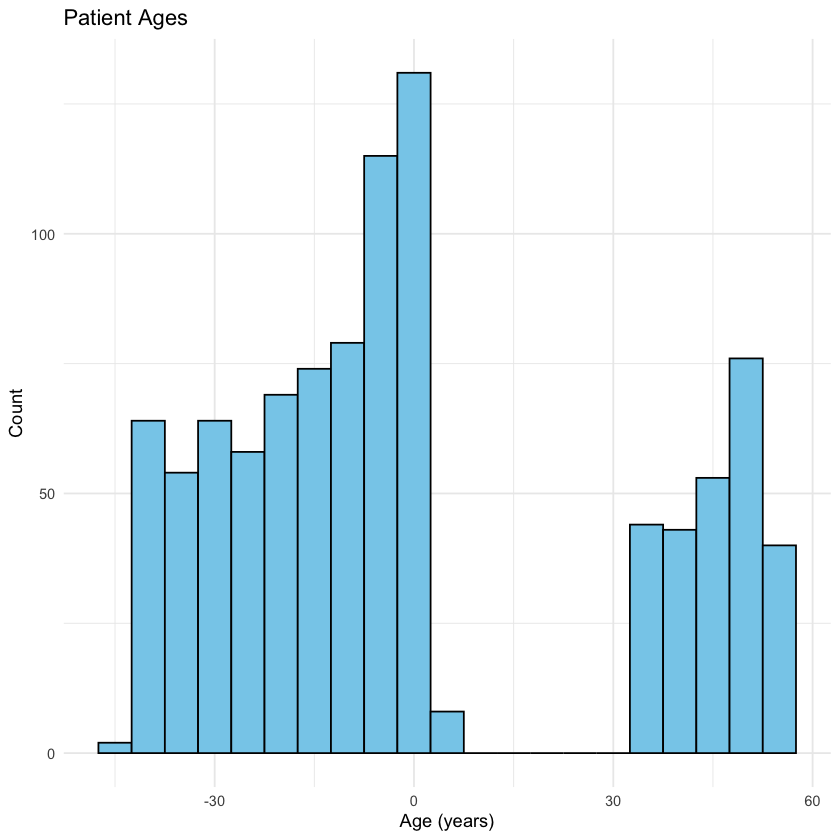

In [182]:
#Question 10
#Make a histogram of the ages of patients by gender
#NOTE: could not figure out dates
library(stringr)
library(ggplot2)

names_joined <- names_joined %>%
  mutate(
    # normalize to plain text and remove any single quotes
    BIRTHDATE_chr = as.character(BIRTHDATE),
    BIRTHDATE_chr = str_squish(BIRTHDATE_chr),
    BIRTHDATE_chr = gsub("'", "", BIRTHDATE_chr),

    # parse m/d/yy
    BIRTHDATE = as.Date(BIRTHDATE_chr, format = "%m/%d/%y"),

    AGE = as.integer(interval(BIRTHDATE, today()) / years(1))
  ) %>%
  select(-BIRTHDATE_chr)

summary(names_joined$BIRTHDATE)
summary(names_joined$AGE)

ggplot(names_joined, aes(x = AGE)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Patient Ages", x = "Age (years)", y = "Count") +
  theme_minimal()







In [183]:
#Question 12
#Make a scatterplot of birthdate by marital status

Warning message in geom_point(width = 0.2, height = 0, alpha = 0.6, color = "skyblue"):
“Ignoring unknown parameters: `width` and `height`”


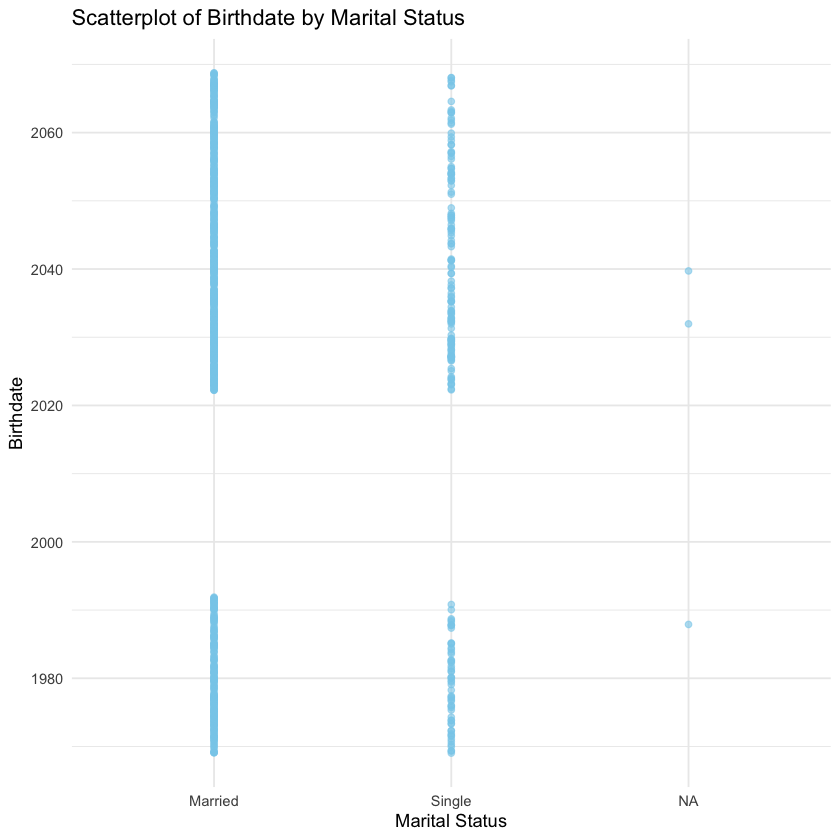

In [187]:
ggplot(names_joined, aes(x = MARITAL, y = BIRTHDATE)) +
  geom_point(width = 0.2, height = 0, alpha = 0.6, color = "skyblue") +
  labs(
    title = "Scatterplot of Birthdate by Marital Status",
    x = "Marital Status",
    y = "Birthdate"
  ) +
  theme_minimal()